# ==========================
# 📊 Análisis de regresión lineal en Python
# Archivo: unificado.xlsx
# ==========================

In [65]:
# 1. Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [66]:
# 2. Cargar el archivo Excel
df = pd.read_excel("unificado.xlsx")

# Revisar primeras filas
df.head()

,INSTITUCION,PROGRAMA,ANIO,SEMESTRE,TOTAL_INSCRITOS
0,CORPORACION UNIVERSITARIA LASALLISTA,ADMINISTRACION DE EMPRESAS AGROPECUARIAS,2014,1,28
1,CORPORACION UNIVERSITARIA LASALLISTA,ADMINISTRACION DE EMPRESAS AGROPECUARIAS,2014,2,11
2,CORPORACION UNIVERSITARIA LASALLISTA,ADMINISTRACION DE EMPRESAS AGROPECUARIAS,2015,1,18
3,CORPORACION UNIVERSITARIA LASALLISTA,ADMINISTRACION DE EMPRESAS AGROPECUARIAS,2015,2,10
4,CORPORACION UNIVERSITARIA LASALLISTA,ADMINISTRACION DE EMPRESAS AGROPECUARIAS,2016,1,16


In [67]:
# 3. Revisar las columnas disponibles
df.columns

Index(['INSTITUCION', 'PROGRAMA', 'ANIO', 'SEMESTRE', 'TOTAL_INSCRITOS'], dtype='object')

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# -----------------------
# 1. Preprocesamiento
# -----------------------

# Seleccionamos las variables categóricas y numéricas
categoricas = ['INSTITUCION', 'PROGRAMA']
numericas = ['ANIO', 'SEMESTRE']
objetivo = 'TOTAL_INSCRITOS'

In [69]:
# Separar X e y
X_cat = df[categoricas]
X_num = df[numericas]
y = df[objetivo]

In [70]:
# Codificar variables categóricas
encoder = OneHotEncoder(handle_unknown='ignore')
X_cat_encoded = encoder.fit_transform(X_cat)

In [71]:
# Convertimos a DataFrame
X_cat_df = pd.DataFrame(X_cat_encoded.toarray(), columns=encoder.get_feature_names_out(categoricas), index=df.index)

In [72]:
# Unimos las variables numéricas con las categóricas codificadas
X = pd.concat([X_cat_df, X_num], axis=1)

In [73]:
# 2. Separar en entrenamiento y prueba
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# 3. Entrenar el modelo
# -----------------------
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [75]:
# 4. Evaluar el modelo
# -----------------------
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio: {mae:.2f} estudiantes")

Error absoluto medio: 58.38 estudiantes


In [76]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate additional regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Create a dictionary with the metrics
metrics = {
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R²)'],
    'Value': [mae, mse, rmse, r2]
}

# Create a pandas DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics)

# Display the table of metrics
print("\nTabla de Indicadores de Confiabilidad del Modelo:")
display(metrics_df)


Tabla de Indicadores de Confiabilidad del Modelo:


,Metric,Value
0,Mean Absolute Error (MAE),58.380000
1,Mean Squared Error (MSE),23550.012877
2,Root Mean Squared Error (RMSE),153.460134
3,R-squared (R²),0.943692


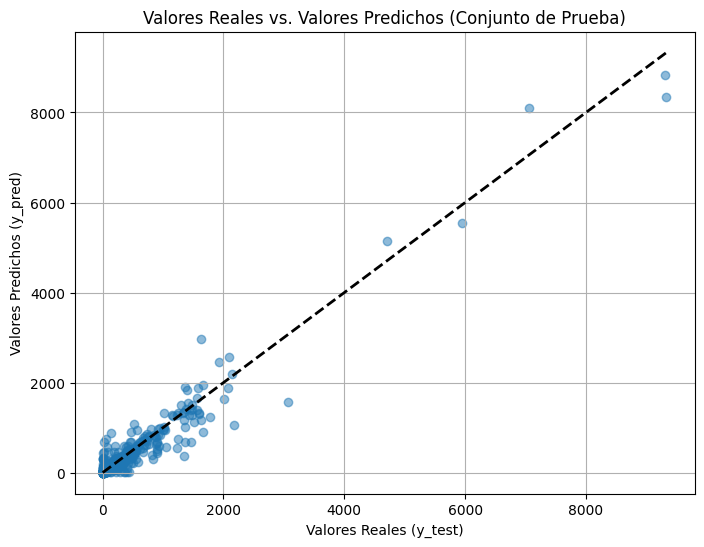

In [77]:
# =====================================================
# 🔹 Visualización de la diferencia entre valores reales y predichos
# =====================================================

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Línea diagonal para referencia
plt.xlabel("Valores Reales (y_test)")
plt.ylabel("Valores Predichos (y_pred)")
plt.title("Valores Reales vs. Valores Predichos (Conjunto de Prueba)")
plt.grid(True)
plt.show()

In [78]:
# 5. Hacer una predicción futura
# -----------------------

# Cambia estos valores según lo que quieras predecir
nueva_muestra = pd.DataFrame([{
    'INSTITUCION': 'CORPORACION UNIVERSITARIA LASALLISTA',
    'PROGRAMA': 'INGENIERIA INFORMATICA',
    'ANIO': 2026,
    'SEMESTRE': 1
}])


#CORPORACION UNIVERSITARIA LASALLISTA
#INGENIERÍA INDUSTRIAL
#INGENIERIA INFORMATICA

#UNIVERSIDAD DE ANTIOQUIA
#INGENIERIA DE SISTEMAS


In [79]:
# Codificar categorías
X_cat_nuevo = encoder.transform(nueva_muestra[categoricas])
X_cat_nuevo_df = pd.DataFrame(X_cat_nuevo.toarray(), columns=encoder.get_feature_names_out(categoricas))

In [80]:
# Unir con las variables numéricas
X_nuevo = pd.concat([X_cat_nuevo_df, nueva_muestra[numericas].reset_index(drop=True)], axis=1)


In [81]:
# Predecir
prediccion = model.predict(X_nuevo)
print(f"📊 Estudiantes estimados: {int(prediccion[0])}")

📊 Estudiantes estimados: 35


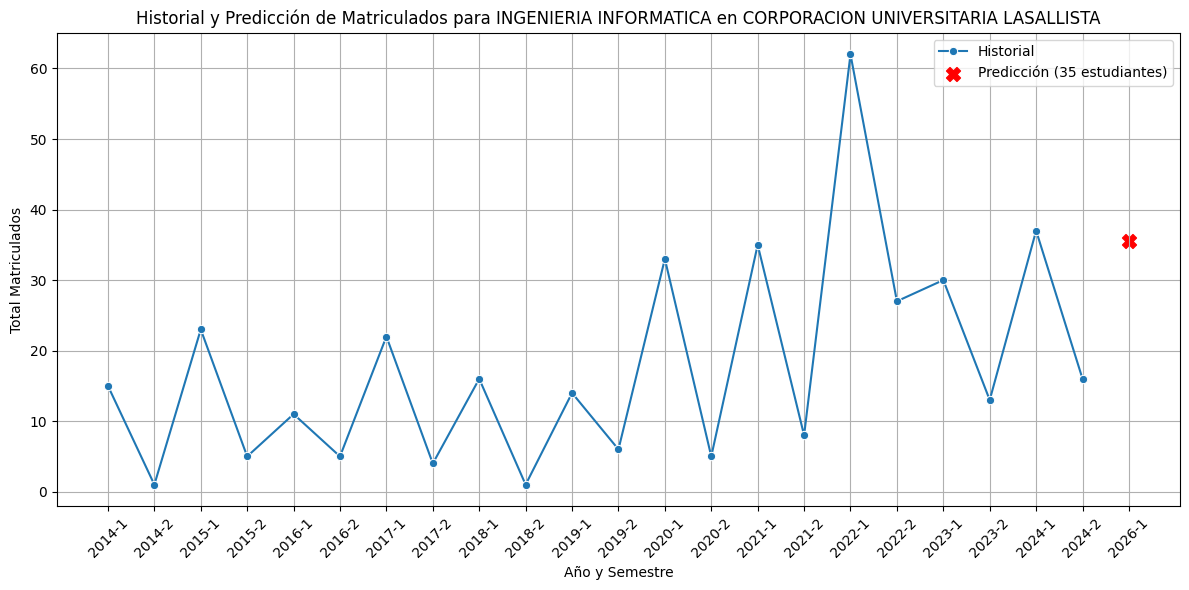

In [82]:
# =====================================================
# 🔹 Visualización del historial de matriculados para la nueva muestra
# =====================================================

# Get the institution and program from nueva_muestra
institucion_futura = nueva_muestra['INSTITUCION'].iloc[0]
programa_futuro = nueva_muestra['PROGRAMA'].iloc[0]
anio_futuro = nueva_muestra['ANIO'].iloc[0]
semestre_futuro = nueva_muestra['SEMESTRE'].iloc[0]
prediccion_valor = prediccion[0] # Get the predicted value

# Filter the historical dataframe based on the selected institution and program
df_filtrado = df[(df['INSTITUCION'] == institucion_futura) & (df['PROGRAMA'] == programa_futuro)].copy()

# Combine ANIO and SEMESTRE for plotting
df_filtrado['PERIODO'] = df_filtrado['ANIO'].astype(str) + '-' + df_filtrado['SEMESTRE'].astype(str)

# Sort by ANIO and SEMESTRE to ensure correct plotting order
df_filtrado = df_filtrado.sort_values(by=['ANIO', 'SEMESTRE'])

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtrado, x='PERIODO', y='TOTAL_INSCRITOS', marker='o', label='Historial')

# Add the predicted point to the plot
periodo_futuro = f'{anio_futuro}-{semestre_futuro}'
plt.scatter(periodo_futuro, prediccion_valor, color='red', s=100, marker='X', label=f'Predicción ({int(prediccion_valor)} estudiantes)')

plt.title(f'Historial y Predicción de Matriculados para {programa_futuro} en {institucion_futura}')
plt.xlabel('Año y Semestre')
plt.ylabel('Total Matriculados')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#Evaluación Hibrida

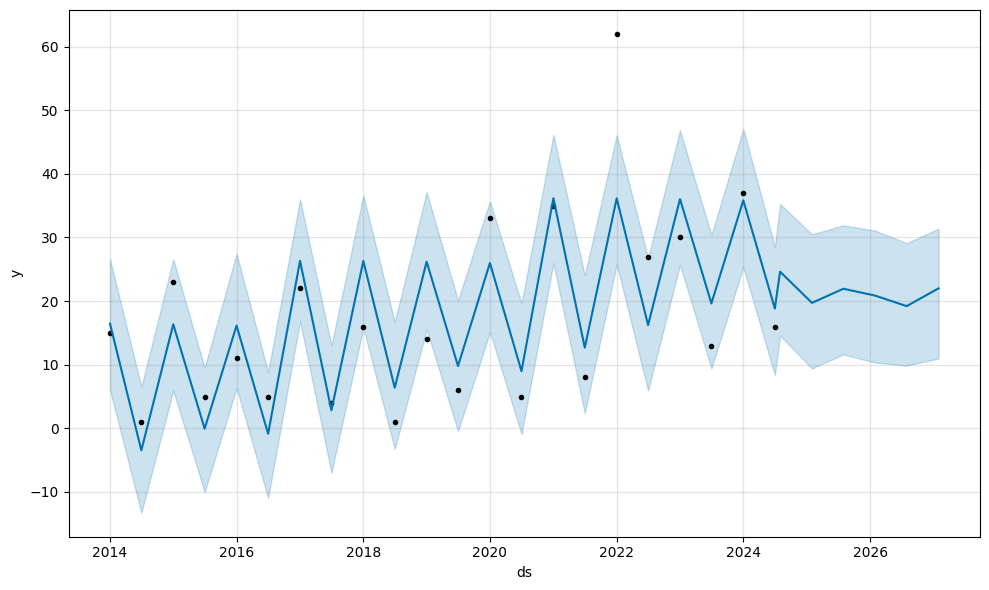

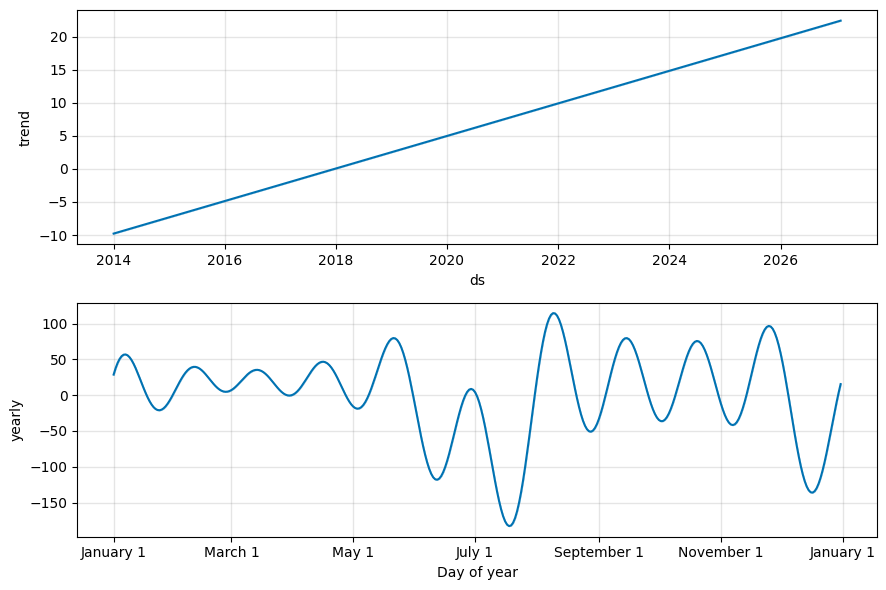

           ds       yhat  yhat_lower  yhat_upper
18 2023-01-01  36.041641   25.722231   46.837391
19 2023-07-01  19.639872    9.418936   30.395601
20 2024-01-01  35.841869   25.349555   47.081427
21 2024-07-01  18.830438    8.337624   28.523722
22 2024-07-31  24.626330   14.581439   35.264798
23 2025-01-31  19.723867    9.409059   30.509346
24 2025-07-31  21.942936   11.625536   31.917081
25 2026-01-31  20.859906   10.334598   31.081178
26 2026-07-31  19.209144    9.858823   29.117058
27 2027-01-31  22.010437   10.985226   31.377452


In [83]:
# ===============================
# 📈 Predicción con Prophet (ejemplo por universidad y programa)
# ===============================
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. Cargar archivo Excel (ya lo tienes en tu notebook, pero lo incluyo por si lo corres aparte)
df = pd.read_excel("unificado.xlsx")

# 2. Seleccionar universidad y programa específico
uni = "CORPORACION UNIVERSITARIA LASALLISTA"   # 👉 cambia por la universidad que quieras
prog = "INGENIERIA INFORMATICA"     # 👉 cambia por el programa que quieras

df_sub = df[(df["INSTITUCION"] == uni) & (df["PROGRAMA"] == prog)].copy()

# 3. Crear columna de fecha a partir de ANIO y SEMESTRE
# semestre 1 → enero (mes 1), semestre 2 → julio (mes 7)
df_sub["MES"] = df_sub["SEMESTRE"].map({1: 1, 2: 7})
df_sub["FECHA"] = pd.to_datetime(df_sub["ANIO"].astype(str) + "-" + df_sub["MES"].astype(str) + "-01")

# 4. Preparar dataset para Prophet (necesita columnas 'ds' y 'y')
prophet_df = df_sub[["FECHA", "TOTAL_INSCRITOS"]].rename(columns={"FECHA": "ds", "TOTAL_INSCRITOS": "y"})

# 5. Entrenar modelo Prophet
model = Prophet(yearly_seasonality=True)
model.fit(prophet_df)

# 6. Crear dataframe de fechas futuras (6 semestres = 3 años)
future = model.make_future_dataframe(periods=6, freq="6M")

# 7. Generar predicciones
forecast = model.predict(future)

# 8. Graficar resultados
fig1 = model.plot(forecast)
plt.show()

# 9. (Opcional) Graficar componentes de la predicción (tendencia, estacionalidad)
fig2 = model.plot_components(forecast)
plt.show()

# 10. Mostrar últimas predicciones
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(10))


#MODELO HIBRIDO

In [90]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt



import logging, warnings

# Silenciar Prophet y cmdstanpy
logging.getLogger("prophet").setLevel(logging.ERROR)
logging.getLogger("cmdstanpy").setLevel(logging.CRITICAL)

# Silenciar warnings de sklearn o matplotlib
warnings.filterwarnings("ignore")

# ========================
# 1. Función para generar yhat de Prophet con limpieza
# ========================
def generar_yhat_prophet(df):
    df_copy = df.copy()
    yhat_values = []

    for (inst, prog), subset in df.groupby(["INSTITUCION", "PROGRAMA"]):
        temp = subset[["ANIO", "SEMESTRE", "TOTAL_INSCRITOS"]].copy()

        # Convertir semestre a mes (1 -> enero, 2 -> julio)
        temp["MES"] = temp["SEMESTRE"].map({1: 1, 2: 7})
        temp["ds"] = pd.to_datetime(dict(year=temp["ANIO"], month=temp["MES"], day=1))
        temp = temp.rename(columns={"TOTAL_INSCRITOS": "y"})

        # 🔹 Limpieza de datos
        temp = temp.dropna(subset=["y"])                 # eliminar NaN
        temp = temp[temp["y"].apply(np.isfinite)]        # eliminar inf
        temp = temp[temp["y"] >= 0]                      # eliminar negativos

        # Prophet requiere al menos 2 registros válidos
        if temp.shape[0] >= 2:
            try:
                model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
                model.add_seasonality(name="semester", period=2, fourier_order=2)
                model.fit(temp[["ds", "y"]])
                forecast = model.predict(temp[["ds"]])
                yhat_values.extend(forecast["yhat"].values)
            except Exception as e:
                print(f"⚠️ Error en {inst} - {prog}: {e}")
                yhat_values.extend([np.nan] * len(subset))
        else:
            yhat_values.extend([np.nan] * len(subset))

    df_copy["yhat_prophet"] = yhat_values
    return df_copy

# ========================
# 2. Función para entrenar RandomForest
# ========================
def entrenar_modelo(df):
    df = generar_yhat_prophet(df)

    X = df[["ANIO", "SEMESTRE", "yhat_prophet"]]
    X = pd.concat([X, pd.get_dummies(df[["INSTITUCION", "PROGRAMA"]], drop_first=True)], axis=1)
    y = df["TOTAL_INSCRITOS"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    modelo = RandomForestRegressor(n_estimators=200, random_state=42)
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R2:", r2_score(y_test, y_pred))

    return modelo, df

# ========================
# 3. Función para predecir valores futuros
# ========================
def predecir_inscritos(modelo, df, institucion, programa, anio, semestre):
    subset = df[(df["INSTITUCION"] == institucion) & (df["PROGRAMA"] == programa)][["ANIO", "SEMESTRE", "TOTAL_INSCRITOS"]].copy()

    subset["MES"] = subset["SEMESTRE"].map({1: 1, 2: 7})
    subset["ds"] = pd.to_datetime(dict(year=subset["ANIO"], month=subset["MES"], day=1))
    subset = subset.rename(columns={"TOTAL_INSCRITOS": "y"})

    # 🔹 Limpieza
    subset = subset.dropna(subset=["y"])
    subset = subset[subset["y"].apply(np.isfinite)]
    subset = subset[subset["y"] >= 0]

    if subset.shape[0] < 2:
        return f"No hay suficientes datos para {institucion} - {programa}"

    model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
    model.add_seasonality(name="semester", period=2, fourier_order=2)
    model.fit(subset[["ds", "y"]])

    future_date = pd.to_datetime(f"{anio}-{1 if semestre==1 else 7}-01")
    forecast = model.predict(pd.DataFrame({"ds": [future_date]}))
    yhat_future = forecast["yhat"].values[0]

    # Preparar input para RandomForest
    X_new = pd.DataFrame([[anio, semestre, yhat_future]], columns=["ANIO", "SEMESTRE", "yhat_prophet"])
    X_new = pd.concat([X_new, pd.get_dummies(pd.DataFrame([[institucion, programa]], columns=["INSTITUCION", "PROGRAMA"]), drop_first=True)], axis=1)

    # Alinear columnas
    missing_cols = set(modelo.feature_names_in_) - set(X_new.columns)
    for col in missing_cols:
        X_new[col] = 0
    X_new = X_new[modelo.feature_names_in_]

    pred = modelo.predict(X_new)[0]
    return round(pred)

# ========================
# 4. Función para graficar evolución y predicción
# ========================
def graficar_prediccion(df, institucion, programa, anio, semestre, prediccion):
    subset = df[(df["INSTITUCION"] == institucion) & (df["PROGRAMA"] == programa)]

    plt.figure(figsize=(10,6))
    plt.plot(subset["ANIO"].astype(str) + "-" + subset["SEMESTRE"].astype(str),
             subset["TOTAL_INSCRITOS"], marker="o", label="Histórico")
    plt.plot(subset["ANIO"].astype(str) + "-" + subset["SEMESTRE"].astype(str),
             subset["yhat_prophet"], marker="x", linestyle="--", label="Prophet (yhat)")

    plt.axvline(f"{anio}-{semestre}", color="red", linestyle="--", label="Predicción futura")
    plt.scatter([f"{anio}-{semestre}"], [prediccion], color="red", s=100, zorder=5,
                label=f"Predicción {anio}-{semestre}: {prediccion}")

    plt.xticks(rotation=45)
    plt.title(f"Evolución de inscritos - {institucion} / {programa}")
    plt.xlabel("Periodo (Año-Semestre)")
    plt.ylabel("Número de inscritos")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [92]:
# Entrenar
modelo, df_hibrido = entrenar_modelo(df)

⚠️ Error en UNIVERSIDAD DE ANTIOQUIA - TECNOLOGIA EN SISTEMAS DE INFORMACION EN SALUD: Error during optimization! Command '/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin random seed=64069 data file=/tmp/tmp92jlcu8l/dx_bna8n.json init=/tmp/tmp92jlcu8l/vgozraza.json output file=/tmp/tmp92jlcu8l/prophet_modelzbl36x06/prophet_model-20250918220017.csv method=optimize algorithm=newton iter=10000' failed: console log output:

method = optimize
  optimize
    algorithm = newton
      newton
    jacobian = 0 (Default)
    iter = 10000
    save_iterations = 0 (Default)
id = 1 (Default)
data
  file = /tmp/tmp92jlcu8l/dx_bna8n.json
init = /tmp/tmp92jlcu8l/vgozraza.json
random
  seed = 64069
output
  file = /tmp/tmp92jlcu8l/prophet_modelzbl36x06/prophet_model-20250918220017.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)
num_threads = 1 (Default)


Initial log joint probability = -19.7139
Ite

Predicción: 33


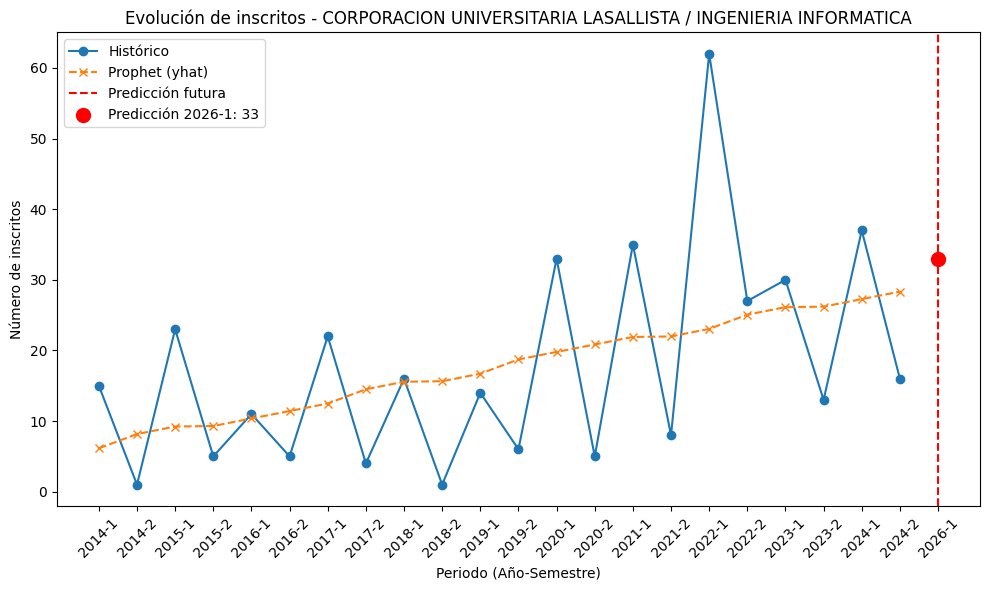

In [93]:

# Predicción futura
resultado = predecir_inscritos(
    modelo, df,
    "CORPORACION UNIVERSITARIA LASALLISTA",
    "INGENIERIA INFORMATICA",
    2026, 1
)
print("Predicción:", resultado)

# Graficar
graficar_prediccion(df_hibrido, "CORPORACION UNIVERSITARIA LASALLISTA", "INGENIERIA INFORMATICA", 2026, 1, resultado)


In [88]:
# ===============================
# 📊 Modelo híbrido Prophet + RandomForest
# ===============================
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

import logging, warnings

# Silenciar Prophet y cmdstanpy
logging.getLogger("prophet").setLevel(logging.ERROR)
logging.getLogger("cmdstanpy").setLevel(logging.CRITICAL)

# Silenciar warnings de sklearn o matplotlib
warnings.filterwarnings("ignore")


# ===============================
# 📊 Modelo híbrido Prophet + RandomForest
# ===============================
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# 1. Cargar datos
df = pd.read_excel("unificado.xlsx")

# 2. Crear columna FECHA a partir de ANIO y SEMESTRE
df["MES"] = df["SEMESTRE"].map({1: 1, 2: 7})
df["FECHA"] = pd.to_datetime(df["ANIO"].astype(str) + "-" + df["MES"].astype(str) + "-01")

# 3. Generar predicciones de Prophet por cada (INSTITUCION, PROGRAMA)
prophet_preds = []

for (uni, prog), group in df.groupby(["INSTITUCION", "PROGRAMA"]):
    prophet_df = group[["FECHA", "TOTAL_INSCRITOS"]].rename(columns={"FECHA": "ds", "TOTAL_INSCRITOS": "y"})

    if len(prophet_df) > 4:  # entrenar solo si hay datos suficientes
        model = Prophet(yearly_seasonality=True)
        model.fit(prophet_df)
        forecast = model.predict(prophet_df[["ds"]])

        tmp = group.copy()
        tmp["yhat_prophet"] = forecast["yhat"].values
        prophet_preds.append(tmp)
    else:
        # si no hay suficientes datos, meter NaN
        tmp = group.copy()
        tmp["yhat_prophet"] = np.nan
        prophet_preds.append(tmp)

df_with_prophet = pd.concat(prophet_preds, ignore_index=True)

# 4. Preparar dataset para RandomForest
categoricas = ["INSTITUCION", "PROGRAMA"]
numericas = ["ANIO", "SEMESTRE", "yhat_prophet"]  # usamos la predicción Prophet como feature
objetivo = "TOTAL_INSCRITOS"

X_cat = df_with_prophet[categoricas]
X_num = df_with_prophet[numericas]
y = df_with_prophet[objetivo]

# OneHotEncoding de categóricas
encoder = OneHotEncoder(handle_unknown="ignore")
X_cat_encoded = encoder.fit_transform(X_cat)
X_cat_df = pd.DataFrame(X_cat_encoded.toarray(), columns=encoder.get_feature_names_out(categoricas), index=df_with_prophet.index)

# Unir features
X = pd.concat([X_cat_df, X_num], axis=1)

# 5. Separar train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Entrenar RandomForest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# 7. Evaluación
y_pred = rf.predict(X_test)
mae_hibrido = mean_absolute_error(y_test, y_pred)

print("Error absoluto medio (MAE) del modelo híbrido:", mae_hibrido)

# ===============================
# Uso del modelo híbrido para predicción futura
# ===============================

def predecir_inscritos(universidad, programa, anio, semestre):
    # Crear fecha objetivo
    mes = 1 if semestre == 1 else 7
    fecha_obj = pd.to_datetime(f"{anio}-{mes}-01")

    # Entrenar Prophet para esa serie
    df_sub = df[(df["INSTITUCION"] == universidad) & (df["PROGRAMA"] == programa)].copy()
    prophet_df = df_sub[["FECHA", "TOTAL_INSCRITOS"]].rename(columns={"FECHA": "ds", "TOTAL_INSCRITOS": "y"})

    model = Prophet(yearly_seasonality=True)
    model.fit(prophet_df)

    future = pd.DataFrame({"ds": [fecha_obj]})
    forecast = model.predict(future)
    yhat_prophet = forecast["yhat"].iloc[0]

    # Construir fila para RandomForest
    X_new_cat = pd.DataFrame([[universidad, programa]], columns=categoricas)
    X_new_num = pd.DataFrame([[anio, semestre, yhat_prophet]], columns=numericas)

    X_new_cat_encoded = encoder.transform(X_new_cat)
    X_new_cat_df = pd.DataFrame(X_new_cat_encoded.toarray(), columns=encoder.get_feature_names_out(categoricas))

    X_new = pd.concat([X_new_cat_df.reset_index(drop=True), X_new_num.reset_index(drop=True)], axis=1)

    # Predicción final híbrida
    pred_rf = rf.predict(X_new)[0]

    return {
        "universidad": universidad,
        "programa": programa,
        "anio": anio,
        "semestre": semestre,
        "prophet": yhat_prophet,
        "hibrido": pred_rf
    }

# Ejemplo de uso:
resultado = predecir_inscritos("UNIVERSIDAD X", "INGENIERÍA", 2027, 2)
print(resultado)





Error absoluto medio (MAE) del modelo híbrido: 55.133651987110625


ValueError: Dataframe has less than 2 non-NaN rows.

In [ ]:
# Entrenar
modelo, df_hibrido = entrenar_modelo(df)

In [ ]:
# Predicción futura
resultado = predecir_inscritos(
    modelo, df,
    "CORPORACION UNIVERSITARIA LASALLISTA",
    "INGENIERIA INFORMATICA",
    2026, 1
)
print("Predicción:", resultado)

# Gráfico con la predicción resaltada
graficar_prediccion(df_hibrido, "CORPORACION UNIVERSITARIA LASALLISTA", "INGENIERIA INFORMATICA", 2026, 1, resultado)

In [ ]:
# Ejemplo de uso:
resultado = predecir_inscritos("CORPORACION UNIVERSITARIA LASALLISTA", "INGENIERIA INFORMATICA", 2026, 1)
print(resultado)